# Modelos predictivos de regresión lineal uni-variable

Por Rodolfo Antonio Zea Posadas

Para acceder al enunciado del proyecto, por favor dar clic [aqui](https://github.com/razp26/python-jupyterNotebooks/blob/master/Python%20para%20Data%20Science/Proyecto/Enunciado.pdf)

Como primer paso para la solucion, se importan las librerias que se utilizaran.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

Una vez hemos importado las librerias que utilizaremos en la solucion, procedemos a cargar los datos de entrada. Estos datos se encuentran el archivo [proyecto_training_data.npy](https://github.com/razp26/python-jupyterNotebooks/blob/master/Python%20para%20Data%20Science/Proyecto/proyecto_training_data.npy) y la descripcion de la informacion del archivo se lista a continuacion:

*Data fields*
*Here's a brief version of what you'll find in the data description file.*

*SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.*


*OverallQual: Overall material and finish quality, rates the overall material and finish of the house*

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
*1stFlrSF: First Floor square feet*

*TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)*

*YearBuilt: Original construction date*

*LotFrontage: Linear feet of street connected to property*

[Archivo de referencia](https://github.com/razp26/python-jupyterNotebooks/blob/master/Python%20para%20Data%20Science/Proyecto/Data_fields.txt)


In [3]:
data = np.load('proyecto_training_data.npy')
print(np.shape(data))

(1460, 6)


De la carga inicial de datos, se utilizará una proporción del 80% para realizar el análisis exploratorio, la selección de variables a utilizar y para crear modelos predictivos. A este subconjunto de datos se le llamara datos de entrenamiento.

In [4]:
n_train_rows = int(np.shape(data)[0]*0.8)
data_train = data[0:n_train_rows]
print (np.shape(data_train))

(1168, 6)


El 20% restante se utilizará para probar, validar y evaluar los modelos resultantes. A este subconjunto de datos se le llamara datos de validación y pruebas.

In [5]:
n_test_rows = int(np.shape(data)[0]*0.2)
data_test = data[-1*n_test_rows:]
print(np.shape(data_test))

(292, 6)


# Análisis exploratorio de datos

Como primer punto, para comenzar a familiarizarnos con la data que se va a utilizar para proponer los modelos, aplicaraemos algunos conceptos de estadística descriptiva para ver la forma en que se distribuyen los datos.

Para cada variable se calculará lo siguiente:

    1. Media
    2. Valor máximo
    3. Valor mínimo
    4. Rango
    5. Desviación estándar

In [6]:
# Calculamos la media por columna
data_mean = np.nanmean(data_train, axis=0)
print('Media')
print('SalePrice: ' + str(data_mean[0]))
print('OverallQual: ' + str(data_mean[1]))
print('1stFlrSF: ' + str(data_mean[2]))
print('TotRmsAbvGrd: ' + str(data_mean[3]))
print('YearBuilt: ' + str(data_mean[4]))
print('LotFrontage: ' + str(data_mean[5]))

# Calculamos el valor máximo por columna
data_max = np.nanmax(data_train, axis=0)
print('\nValor máximo')
print('SalePrice: ' + str(data_max[0]))
print('OverallQual: ' + str(data_max[1]))
print('1stFlrSF: ' + str(data_max[2]))
print('TotRmsAbvGrd: ' + str(data_max[3]))
print('YearBuilt: ' + str(data_max[4]))
print('LotFrontage: ' + str(data_max[5]))

# Calculamos el valor mínimo por columna
data_min = np.nanmin(data_train, axis=0)
print('\nValor mínimo')
print('SalePrice: ' + str(data_min[0]))
print('OverallQual: ' + str(data_min[1]))
print('1stFlrSF: ' + str(data_min[2]))
print('TotRmsAbvGrd: ' + str(data_min[3]))
print('YearBuilt: ' + str(data_min[4]))
print('LotFrontage: ' + str(data_min[5]))

# Calculamos el rango por columna
data_rango = data_max - data_min
print('\nRango')
print('SalePrice: ' + str(data_rango[0]))
print('OverallQual: ' + str(data_rango[1]))
print('1stFlrSF: ' + str(data_rango[2]))
print('TotRmsAbvGrd: ' + str(data_rango[3]))
print('YearBuilt: ' + str(data_rango[4]))
print('LotFrontage: ' + str(data_rango[5]))

# Calculamos la desviación estándar por columna
data_std = np.nanstd(data_train, axis=0)
print('\nDesviación estándar')
print('SalePrice: ' + str(data_std[0]))
print('OverallQual: ' + str(data_std[1]))
print('1stFlrSF: ' + str(data_std[2]))
print('TotRmsAbvGrd: ' + str(data_std[3]))
print('YearBuilt: ' + str(data_std[4]))
print('LotFrontage: ' + str(data_std[5]))

Media
SalePrice: 180590.27739726027
OverallQual: 6.101027397260274
1stFlrSF: 1156.3236301369864
TotRmsAbvGrd: 6.4854452054794525
YearBuilt: 1971.451198630137
LotFrontage: 69.94698544698545

Valor máximo
SalePrice: 755000.0
OverallQual: 10.0
1stFlrSF: 3228.0
TotRmsAbvGrd: 14.0
YearBuilt: 2010.0
LotFrontage: 313.0

Valor mínimo
SalePrice: 34900.0
OverallQual: 1.0
1stFlrSF: 334.0
TotRmsAbvGrd: 2.0
YearBuilt: 1875.0
LotFrontage: 21.0

Rango
SalePrice: 720100.0
OverallQual: 9.0
1stFlrSF: 2894.0
TotRmsAbvGrd: 12.0
YearBuilt: 135.0
LotFrontage: 292.0

Desviación estándar
SalePrice: 78781.95108033362
OverallQual: 1.377435193240741
1stFlrSF: 373.620331503586
TotRmsAbvGrd: 1.6084517167387253
YearBuilt: 29.93888206867768
LotFrontage: 23.4659548199304


Continuando con el análisis exploratorio de los datos, se procede a graficar un histograma para cada una de las variables.

Text(0.5, 1.0, 'Variable SalePrice')

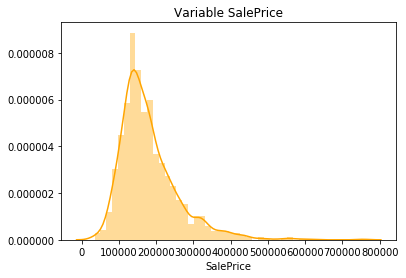

In [7]:
label_sale_price = pd.Series(data_train[:,0], name="SalePrice")
hist_sale_price = sns.distplot(label_sale_price.dropna(), color="orange")
hist_sale_price.set_title('Variable SalePrice')

Text(0.5, 1.0, 'Variable OverallQual')

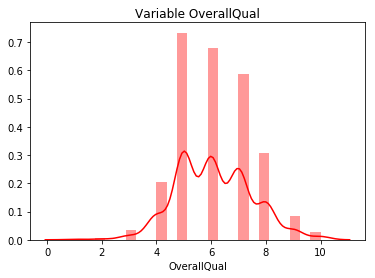

In [8]:
label_overall_quality = pd.Series(data_train[:,1], name="OverallQual")
hist_overall_quality = sns.distplot(label_overall_quality.dropna(), color="red")
hist_overall_quality.set_title('Variable OverallQual')

Text(0.5, 1.0, 'Variable 1stFlrSF')

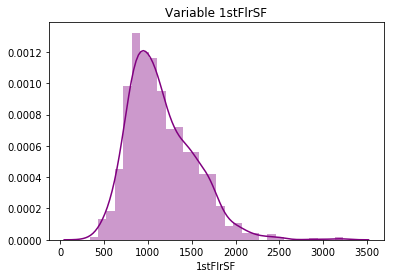

In [9]:
label_first_floor_sf = pd.Series(data_train[:,2], name="1stFlrSF")
hist_first_floor_sf = sns.distplot(label_first_floor_sf.dropna(), color="purple")
hist_first_floor_sf.set_title("Variable 1stFlrSF")

Text(0.5, 1.0, 'Variable TotRmsAbvGrd')

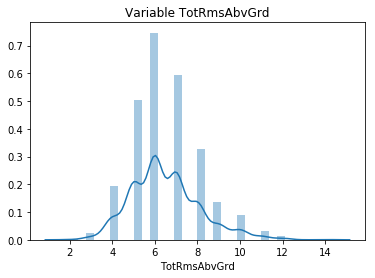

In [10]:
label_total_rooms_above_grade = pd.Series(data_train[:,3], name="TotRmsAbvGrd")
hist_total_rooms_above_grade = sns.distplot(label_total_rooms_above_grade.dropna())
hist_total_rooms_above_grade.set_title('Variable TotRmsAbvGrd')

Text(0.5, 1.0, 'Variable YearBuilt')

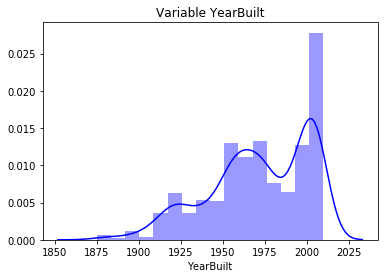

In [11]:
label_year_built = pd.Series(data_train[:,4], name="YearBuilt")
hist_year_built = sns.distplot(label_year_built.dropna(), color="blue")
hist_year_built.set_title('Variable YearBuilt')

Text(0.5, 1.0, 'Variable LotFrontage')

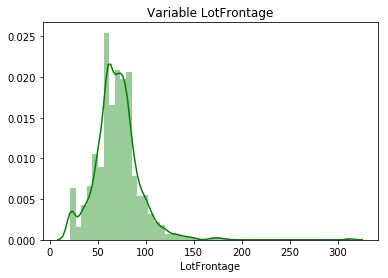

In [12]:
label_lot_frontage = pd.Series(data_train[:,5], name="LotFrontage")
hist_lot_frontage = sns.distplot(label_lot_frontage.dropna(), color="green")
hist_lot_frontage.set_title('Variable LotFrontage')

A continuación procedemos a calcular el coeficiente de correlación entre la variable dependiente (SalePrice) y cada variable independiente (OverallQual, 1stFlrSF, TotRmsAbvGrd, YearBuilt y LotFrontage)

El coeficiente de correlación entre SalePrice y OverallQual es: 0.7939900504626408


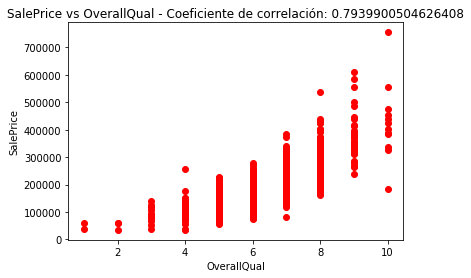

In [13]:
coef_overall_quality = np.corrcoef(data_train[:,1], data_train[:,0])[0,1]
print('El coeficiente de correlación entre SalePrice y OverallQual es: ' + str(coef_overall_quality))

plt.scatter(data_train[:,1], data_train[:,0], color="red")
plt.title("SalePrice vs OverallQual - Coeficiente de correlación: " + str(coef_overall_quality))
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

El coeficiente de correlación entre SalePrice y 1stFlrSF es: 0.6162887000998717


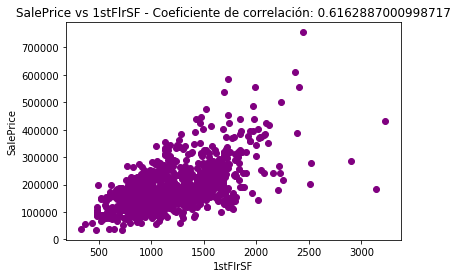

In [14]:
coef_first_floor_sf = np.corrcoef(data_train[:,2], data_train[:,0])[0,1]
print('El coeficiente de correlación entre SalePrice y 1stFlrSF es: ' + str(coef_first_floor_sf))

plt.scatter(data_train[:,2], data_train[:,0], color="purple")
plt.title("SalePrice vs 1stFlrSF - Coeficiente de correlación: " + str(coef_first_floor_sf))
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show()

El coeficiente de correlación entre SalePrice y TotRmsAbvGrd es: 0.5647069399593067


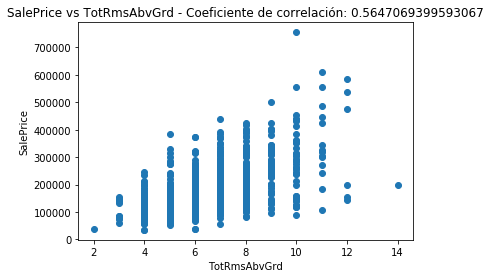

In [15]:
coef_tot_rooms_above_ground = np.corrcoef(data_train[:,3], data_train[:,0])[0,1]
print('El coeficiente de correlación entre SalePrice y TotRmsAbvGrd es: ' + str(coef_tot_rooms_above_ground))

plt.scatter(data_train[:,3], data_train[:,0])
plt.title("SalePrice vs TotRmsAbvGrd - Coeficiente de correlación: " + str(coef_tot_rooms_above_ground))
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()

El coeficiente de correlación entre SalePrice y YearBuilt es: 0.5341706927117515


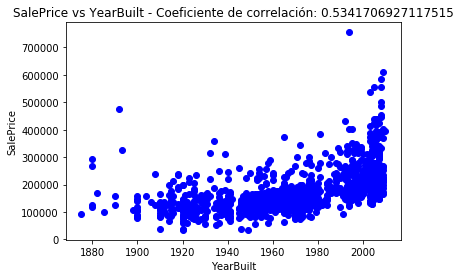

In [16]:
coef_year_built = np.corrcoef(data_train[:,4], data_train[:,0])[0,1]
print('El coeficiente de correlación entre SalePrice y YearBuilt es: ' + str(coef_year_built))

plt.scatter(data_train[:,4], data_train[:,0], color="blue")
plt.title("SalePrice vs YearBuilt - Coeficiente de correlación: " + str(coef_year_built))
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

El coeficiente de correlación entre SalePrice y LotFrontage es: 0.3632916166538921


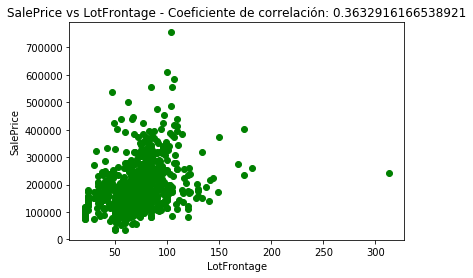

In [17]:
data_without_nan = data_train[~np.isnan(data_train).any(axis=1)]
coef_lot_frontage = np.corrcoef(data_without_nan[:,5], data_without_nan[:,0])[0,1]
print('El coeficiente de correlación entre SalePrice y LotFrontage es: ' + str(coef_lot_frontage))

plt.scatter(data_without_nan[:,5], data_without_nan[:,0], color="green")
plt.title("SalePrice vs LotFrontage - Coeficiente de correlación: " + str(coef_lot_frontage))
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

En base a los resultados del análisis exploratorio de los datos, se eligen las variables OverallQual y 1stFlrSF debido a que son las que presentan una mayor correlación con la variable dependiente SalePrice.

# Función para entrenar un modelo de regresión lineal de una variable

A continuación definimos una función cuya finalidad es entrenar un modelo de regresión lineal de una variable. Dicho modelo tiene la forma:

y = mx + b

La función recibe los siguientes parámetros:

    1- vector con  la variable independiente “x” ,  
    2- vector con la variable dependiente “y”,  
    3- un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
    4- un entero  “imprimir_error_cada”  , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
    5- escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.


In [148]:
def modelo_lineal(x, y, epochs, imprimir_error_cada, lr):
    # Se crea una matriz inicial con dos columnas. La primera es x y la segunda se inicaliza con 1
    matriz_entrenamiento = np.column_stack((x, np.ones(x.shape[0], dtype=int)))
    
    # Se inicializa un vector de (m,b) con valores de 0
    # m = vector_mb[0]
    # b = vector_mb[1]
    vector_mb = np.ones((2))
    
    # Vector donde se almacenan los errores
    errores = np.zeros(shape=(epochs,2))
    
    # Inicializamos nuestro diccionario con los valores del modelo por iteración
    diccionario_resultados = {}
    
    for i in range(0, epochs):
        # Calculamos el número de iteración
        iteracion = i + 1
        # Almacenamos el modelo resultante de cada iteración
        diccionario_resultados[iteracion] = vector_mb.copy()
        # Se calcula el valor de yhat
        yhat = np.matmul(matriz_entrenamiento, vector_mb)
        # Se calcula el valor del error en la iteración
        error = (1/2)*np.mean(np.power(y - yhat, 2))
        # Se almacena el error de la iteración en el vector de errores
        errores[i,0] = iteracion
        errores[i,1] = error
        # Se calculan los gradientes
        gradiente_mb = np.mean((yhat - y).reshape(y.size,1) * matriz_entrenamiento, axis=0)
        # Se actualizan los valores de m y b
        vector_mb -= lr * gradiente_mb
        # Verificamos si se debe de imprimir el error de la iteracion
        if iteracion % imprimir_error_cada == 0:
            print('Iteración: ' + str(iteracion))
            print('Error del modelo: ' + str(error))
    
    # Retornamos el arreglo de vectores y el diccionario de resultados
    return errores, diccionario_resultados

x = data_train[:,1]
y = data_train[:,0]
epochs = 50000
imprimir_error_cada = 5000
learning_rate = 0.01
errores, diccionario_resultados = modelo_lineal(x, y, epochs, imprimir_error_cada, learning_rate)

Iteración: 5000
Error del modelo: 1149093197.2243507
Iteración: 10000
Error del modelo: 1146935322.2768915
Iteración: 15000
Error del modelo: 1146916387.0841854
Iteración: 20000
Error del modelo: 1146916220.9292731
Iteración: 25000
Error del modelo: 1146916219.471276
Iteración: 30000
Error del modelo: 1146916219.458482
Iteración: 35000
Error del modelo: 1146916219.4583697
Iteración: 40000
Error del modelo: 1146916219.458369
Iteración: 45000
Error del modelo: 1146916219.4583693
Iteración: 50000
Error del modelo: 1146916219.4583688


A continuación se crea una función que permite visualizar cómo cambia el error en cada iteración.

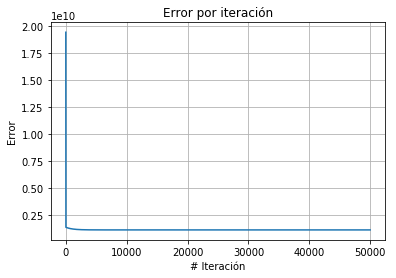

In [150]:
def grafica_error_iteracion(errores):
    iteraciones = errores[:,0]
    errores_valor = errores[:,1]
    plt.plot(iteraciones, errores_valor)
    plt.xlabel('# Iteración')
    plt.ylabel('Error')
    plt.title('Error por iteración')
    plt.grid()
    plt.show()
    
grafica_error_iteracion(errores)

Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo : Crear una función que tome como parámetro la estructura de datos conteniendo el historial de modelos ,y un valor “n” que indica cada cuantas iteraciones graficar el modelo resultante,  por ejemplo para n=3 la función debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

[-43062.35281297 352330.75371856]


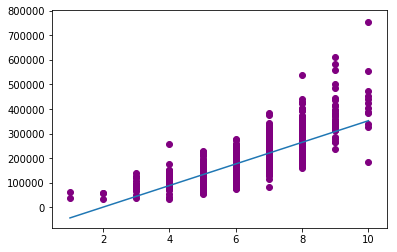

[-50308.62373517 357152.09932887]


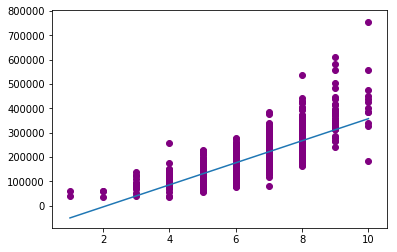

[-50987.41507915 357603.73682652]


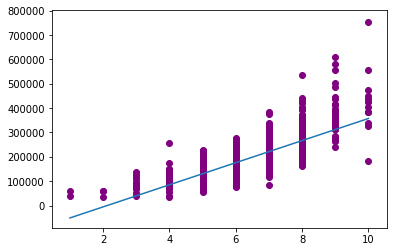

[-51051.00056934 357646.04377685]


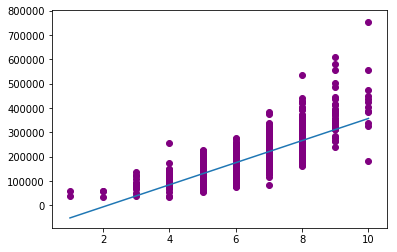

[-51056.95691307 357650.00686242]


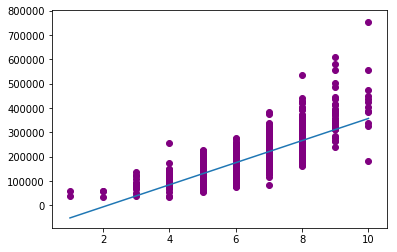

[-51057.51487103 357650.37810277]


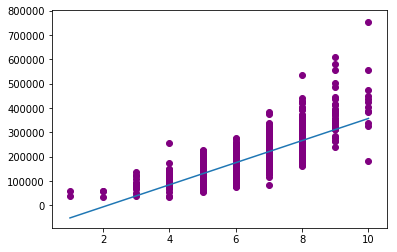

[-51057.5671375  357650.41287855]


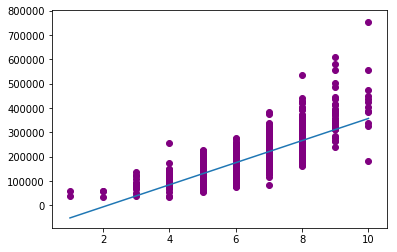

[-51057.57203354 357650.41613616]


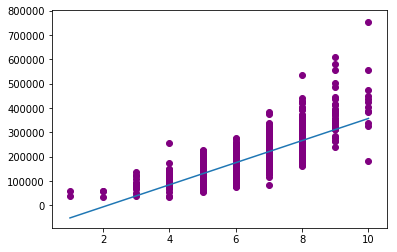

[-51057.57249218 357650.41644131]


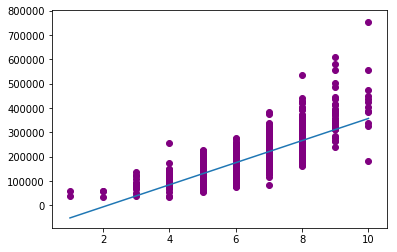

In [177]:
def grafica_modelo(resultados, graficar_cada_iteraciones, x, y):
    for i in range(1, len(resultados)):
        if i % graficar_cada_iteraciones == 0:
            vector_mb = resultados[i]
            x_rango = np.array([np.nanmin(x), np.nanmax(x)])
            y_rango = vector_mb[0]* x_rango + vector_mb[1]
            
            plt.plot(x_rango, y_rango)
            plt.scatter(x, y, color="purple")
            plt.show()
        
grafica_modelo(diccionario_resultados, 5000, x, y)
    